<a href="https://colab.research.google.com/github/aysegullkadiroglu/techcareer-ml-bootcamp/blob/main/lecture-notes/Techcareer_07_10_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

In [2]:
data = pd.read_csv('data.csv')

data = data.dropna()

train_input = np.array(data.x[0:500]).reshape(500,1)
train_output = np.array(data.y[0:500]).reshape(500,1)

test_input = np.array(data.x[500:700]).reshape(199,1)
test_output = np.array(data.y[500:700]).reshape(199,1)

In [3]:
class LinearRegression:
    def __init__(self):
        self.parameters = {}
    def forward_propagation(self,train_input):
        m = self.parameters['m']
        c = self.parameters['c']
        predictions = np.multiply(m,train_input)+c
        return predictions
    def cost_function(self,predictions,train_output):
        cost = np.mean((train_output - predictions)**2)
        return cost
    def backward_propagation(self,train_input,train_output,predictions):
        derivates = {}
        df = (train_output - predictions)* -1
        dm = np.mean(np.multiply(train_input, df))
        dc = np.mean(df)
        derivates['dm'] = dm
        derivates['dc'] = dc
        return derivates
    def update_parameters(self,derivates, learning_rate):
        self.parameters['m'] = self.parameters['m'] - learning_rate * derivates['dm']
        self.parameters['c'] = self.parameters['c'] - learning_rate * derivates['dc']

    def train(self,train_input,train_output,learning_rate,iters):
        self.parameters['m']=np.random.uniform(0,1)* -1
        self.parameters['c']=np.random.uniform(0,1)* -1
        self.loss=[]

        for i in range(iters):
            predictions = self.forward_propagation(train_input)
            cost = self.cost_function(predictions, train_output)

            self.loss.append(cost)
            print('İterasyon = {}, Loss = {}'.format(i+1, cost))

            derivates = self.backward_propagation(train_input,train_output,predictions)
            self.update_parameters(derivates, learning_rate)
        return self.parameters, self.loss

In [4]:
linear_regression_modeli = LinearRegression()
parameters, loss = linear_regression_modeli.train(train_input,train_output, 0.0001, 20)

İterasyon = 1, Loss = 6903.402160881861
İterasyon = 2, Loss = 3136.3539038430667
İterasyon = 3, Loss = 1427.23993707427
İterasyon = 4, Loss = 651.8130372538094
İterasyon = 5, Loss = 300.0009938980856
İterasyon = 6, Loss = 140.38348013368733
İterasyon = 7, Loss = 67.96483732745628
İterasyon = 8, Loss = 35.108418860009586
İterasyon = 9, Loss = 20.201425395820195
İterasyon = 10, Loss = 13.438105937132123
İterasyon = 11, Loss = 10.369580395009649
İterasyon = 12, Loss = 8.977386945339582
İterasyon = 13, Loss = 8.345747222790346
İterasyon = 14, Loss = 8.059171568657078
İterasyon = 15, Loss = 7.929151864571954
İterasyon = 16, Loss = 7.87016176843212
İterasyon = 17, Loss = 7.843397884093007
İterasyon = 18, Loss = 7.831255067743589
İterasyon = 19, Loss = 7.825745846136614
İterasyon = 20, Loss = 7.823246293812551


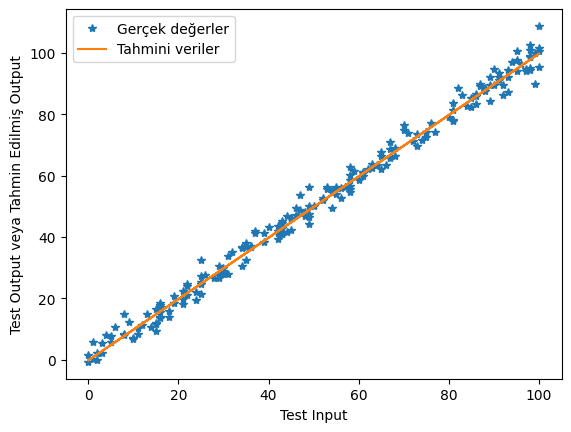

In [5]:
y_pred = test_input * parameters['m'] + parameters['c']

plt.plot(test_input, test_output, '*', label='Gerçek değerler')
plt.plot(test_input, y_pred, label='Tahmini veriler')
plt.xlabel('Test Input')
plt.ylabel('Test Output veya Tahmin Edilmiş Output')
plt.legend()
plt.show()